In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random, uniform
import math

In [7]:
class GenerateData:
    @staticmethod
    def generate_linear(n=100):
        pts = np.random.uniform(0, 1, (n, 2))
        inputs = []
        labels = []
        for pt in pts:
            inputs.append([pt[0], pt[1]])
            distance = (pt[0] - pt[1]) / 1.414
            if pt[0] > pt[1]:
                labels.append(0)
            else:
                labels.append(1)
        return np.array(inputs), np.array(labels).reshape(n, 1)
    
    @staticmethod
    def generate_XOR_easy():
        inputs = []
        labels = []

        for i in range(11):
            inputs.append([0.1*i, 0.1*i])
            labels.append(0)

            if 0.1*i == 0.5:
                continue

            inputs.append([0.1*i, 1-0.1*i])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape(21, 1)

In [193]:
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title("Ground Truth", fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
            
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize = 18)
    for i in range(x.shape[0]):
        if abs(pred_y[i]) >=0.9:
            plt.plot(x[i][0], x[i][1], 'bo')
            print("print Blue", pred_y[i])
            
        else:
            plt.plot(x[i][0], x[i][1], 'ro')
            print("print Red", pred_y[i])
            
    plt.show()

In [198]:
def show_accuracy(Y_train, Y_predict):
    correct = 0
    for i in range(len(Y_predict)):
        if Y_train[i][0]==0 and (Y_predict[i] < 0.9):
            correct += 1
        elif Y_train[i][0]==1 and (Y_predict[i] >= 0.9):
            correct += 1
    print(f"Accuracy--> {round(correct/len(Y_predict), 3)*100}%")

In [195]:
Y_predict

[0.00025443284879322176,
 0.0002709819005605295,
 0.9999781335926392,
 0.9999781280854267,
 0.003981501092359111,
 0.0002544960090923753,
 0.00025475426336809946,
 0.0002551680558583649,
 0.9999779615669946,
 0.0002544422158694064,
 0.0002736959621644776,
 0.9999780699413697,
 0.999976892627685,
 0.9930667892924627,
 0.9999707901916378,
 0.00037247574790640845,
 0.9999773923099616,
 0.000292950901304115,
 0.9999780040996797,
 0.00026041780230643313,
 0.00025745848687811087,
 0.9999781040713857,
 0.0002555190538986569,
 0.9999781362494047,
 0.9999754941879492,
 0.00026462168875226143,
 0.9998723817005367,
 0.999978153164089,
 0.9999781337247082,
 0.9999781413736226,
 0.999977315189283,
 0.0002543968875455654,
 0.0002765563953813995,
 0.9999781155221892,
 0.9999597098011738,
 0.00034573917308674493,
 0.00026509144054378826,
 0.00025680353205389514,
 0.9999781467633277,
 0.9999781524608317,
 0.9999780198560064,
 0.00025800637315236076,
 0.9999777836030138,
 0.00025836723790716935,
 0.0002

In [ ]:
# def learningCurve(n_epoch, loss):
#     plt.title("Learning Curve", fontsize = 18)
#     plt.plot([x for x in range(1,n_epoch+1)], loss,color='blue', label="learning curve")
#     plt.legend(loc = 'upper right')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.show()

In [43]:
class SimpleNN:
    def __init__(self):
        self.network = list()
        self.neuronNum = list()
        self.l_rate = 0.01
        self.n_epoch = 1000
        self.haveLearningCurve = True
        seed(1)
    def addLayer(self, n_neuron, **karg):
        if "n_inputs" in karg.keys():
            #This is input layer
            n_inputs = karg['n_inputs']
            inputLayer = [{"weight":[uniform(-1,1)  for __ in range(n_inputs+1)]}for _ in range(n_neuron)] #weight[-1] is for Bias
            self.network.append(inputLayer)
            self.neuronNum.append(n_inputs)
            self.neuronNum.append(n_neuron)
        else:
            #This is hidden/output layer
            try:
                if len(self.neuronNum)>0:
                    n_previousNeuron = self.neuronNum[-1]
                    middleLayer = [{"weight":[uniform(-1,1)    for __ in range(n_previousNeuron+1)]}for _ in range(n_neuron)]
                    self.network.append(middleLayer)
                    self.neuronNum.append(n_neuron)
                else:
                    raise Exception('Error Layer! (You must check last layer.(Or you miss n_inputs parameter there?))')

            except Exception as error:
                print('Caught this error: ' + repr(error))
    def setting(self, l_rate, n_epoch, haveLearningCurve=True ):
        self.l_rate = l_rate
        self.n_epoch = n_epoch
        self.haveLearningCurve = haveLearningCurve
        print("----Training Setting----")
        print(f"Epoch:{self.n_epoch}")
        print(f"Learning Rate:{self.l_rate}")
        print(f"Learning Curve:{self.haveLearningCurve}")
        print("------------------------")
        
    def describe(self):
        print("----Network Description----")
        print(f"total {len(self.network)} layers")
        print(f"{len(self.network)-1} hidden layer")
        print("one output layer")
        for index, layer in enumerate(self.network):
            print(f"-Layer {index+1}-")
            print(f"{len(layer)} neurons")
            for neu_index, neuron in enumerate(layer):
                print(f"neuron{neu_index}:")
                print(f"weight:{neuron['weight'][:-1]}")
                print(f"bias:{neuron['weight'][-1]}")
        print("---------------------------")
    
    #Caculate "net" value
    #weights(List): the weight between inputs and neurons. Notice: weights[-1] is the bias. 
    #inputs(List): X_train or the outputs of previous layer
    def activateProcess(self, weights, inputs):
        bias = weights[-1]
        value = -bias
        for i in range(len(weights)-1):
            value += weights[i]*inputs[i]
        return value
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def foward(self, rowData):
        inputs = rowData #get input data(by one data) Ex. x[0]~x[n]
    #     print("forward_input",inputs)
        for layer in self.network:
            new_inputs = list()
            for neuron in layer:
                output = self.activateProcess(neuron["weight"], inputs)
                output_sigmoid = self.sigmoid(output)
                neuron["output"] = output_sigmoid
                new_inputs.append(output_sigmoid)
            inputs = new_inputs
        return inputs
    
    def derivate_sigmoid(self, x):
        return x * (1.0 - x)
    
    #groundTruth: y(List), y[0]~y[n]
    def backwardPropagation(self, groundTruth):
        for i in reversed(range(len(self.network))):
            if i == (len(self.network)-1):
                #It is a  output layer!
                for index, neuron in enumerate(self.network[i]):
                    diff = groundTruth[index]-neuron['output']
                    neuron['delta'] = diff  #The Derivative of MSE -> -(T-Y)
            else:
                #It is not a ouput layer!
                for index, neuron in enumerate(self.network[i]):
                    error = 0
                    for nextNeuron in self.network[i+1]:
                        error += nextNeuron['weight'][index] * nextNeuron['delta']
                    neuron['delta'] = error

            for neuron in self.network[i]:
                neuron['delta'] = neuron['delta'] * self.derivate_sigmoid(neuron['output'])
    
    #initInputs: Original input(X_train)
    def updateWeight(self, initInputs):
        inputs = initInputs
        tempInput = list()
        for nowIndex, layer in enumerate(self.network):
            if nowIndex != 0:
                # Not First Hidden layer
                inputs = tempInput.copy()
                tempInput.clear()
            for neuron in layer:
                for index, inputItem in enumerate(inputs):
                    neuron['weight'][index] +=  self.l_rate * neuron['delta'] * inputItem #For weight
                neuron['weight'][-1] += -(self.l_rate) * neuron['delta'] # For Bias
                tempInput.append(neuron['output'])
                
    def learningCurve(self):
        plt.title("Learning Curve", fontsize = 18)
        plt.plot([x for x in range(1,self.n_epoch+1)], self.errorList,color='blue', label="learning curve")
        plt.legend(loc = 'upper right')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    def trainNetwork(self, X_train, Y_train):
        print("----Training Setting----")
        print(f"Epoch:{self.n_epoch}")
        print(f"Learning Rate:{self.l_rate}")
        print(f"Learning Curve:{self.haveLearningCurve}")
        print("------------------------")
        self.describe()
        
        errorList = list()
        for epoch in range(self.n_epoch):
            sum_error = 0
            for index, row in enumerate(X_train):
                #row: [0.1, 0.2]
                Y_predict = self.foward(row) #n_outputs dimension
                sum_error += sum([(Y_train[index][i]-Y_predict[i])**2 for i in range(self.neuronNum[-1])]) 
                self.backwardPropagation(Y_train[index])
                self.updateWeight(row)
            error = sum_error/len(X_train)
            errorList.append(round(error, 3))
            print('==epoch=%d, lrate=%.3f, error=%.3f==' % (epoch, self.l_rate, error))
        self.errorList = errorList
        if self.haveLearningCurve:
            self.learningCurve()
    
    def predict(self, X_test):
        result = list()
        for index, row in enumerate(X_test):
            print(f"Predict:{index}, {row}")
            Y_predict = self.foward(row)
            result.append(Y_predict[0])
        return result

    
        

In [ ]:
# # make a new Neural Network
# def establishNN(n_inputs, n_hidden1, n_hidden2, n_output):
#     network = list()
#     hidden1 = [{"weight":[uniform(-1,1)  for __ in range(n_inputs+1)]}for _ in range(n_hidden1)] #weight[-1] is for Bias
#     network.append(hidden1)
#     hidden2 = [{"weight":[uniform(-1,1)     for __ in range(n_hidden1+1)]}for _ in range(n_hidden2)]
#     network.append(hidden2)
#     output = [{"weight":[uniform(-1,1)    for __ in range(n_hidden2+1)]}for _ in range(n_output)]
#     network.append(output)
#     print("----Network Description----")
#     print(f"total {len(network)} layers")
#     print("two hidden layer")
#     print("one output layer")
#     for index, layer in enumerate(network):
#         print(f"-Layer {index+1}-")
#         print(f"{len(layer)} neurons")
#         for neu_index, neuron in enumerate(layer):
#             print(f"neuron{neu_index}:")
#             print(f"weight:{neuron['weight'][:-1]}")
#             print(f"bias:{neuron['weight'][-1]}")
#     print("---------------------------")
#     return network

In [ ]:
# #Caculate "net" value
# #weights(List): the weight between inputs and neurons. Notice: weights[-1] is the bias. 
# #inputs(List): X_train or the outputs of previous layer
# def activateProcess(weights, inputs):
#     bias = weights[-1]
#     value = -bias
#     for i in range(len(weights)-1):
#         value += weights[i]*inputs[i]
# #         print("activate", inputs[i])
#     return value

In [ ]:
# def sigmoid(x):
#     return 1.0/(1.0 + np.exp(-x))

In [ ]:
# def foward(networks, rowData):
#     inputs = rowData #get input data(by one data) Ex. x[0]~x[n]
# #     print("forward_input",inputs)
#     for layer in networks:
#         new_inputs = list()
#         for neuron in layer:
#             output = activateProcess(neuron["weight"], inputs)
#             output_sigmoid = sigmoid(output)
#             neuron["output"] = output_sigmoid
#             new_inputs.append(output_sigmoid)
#         inputs = new_inputs
#     return inputs

In [ ]:
# def derivate_sigmoid(x):
#     return x * (1.0 - x)

In [ ]:
# #groundTruth: y(List), y[0]~y[n]
# def backwardPropagation(network, groundTruth):
#     for i in reversed(range(len(network))):
#         if i == (len(network)-1):
#             #It is a  output layer!
#             for index, neuron in enumerate(network[i]):
#                 diff = groundTruth[index]-neuron['output']
#                 neuron['delta'] = diff  #The Derivative of MSE -> -(T-Y)
#         else:
#             #It is not a ouput layer!
#             for index, neuron in enumerate(network[i]):
#                 error = 0
#                 for nextNeuron in network[i+1]:
#                     error += nextNeuron['weight'][index] * nextNeuron['delta']
#                 neuron['delta'] = error
                      
#         for neuron in network[i]:
#             neuron['delta'] = neuron['delta'] * derivate_sigmoid(neuron['output'])
                

In [ ]:
# #initInputs: Original input(X_train)
# def updateWeight(network, initInputs, l_rate):
#     inputs = initInputs
#     tempInput = list()
#     for nowIndex, layer in enumerate(network):
#         if nowIndex != 0:
#             # Not First Hidden layer
#             inputs = tempInput.copy()
#             tempInput.clear()
#         for neuron in layer:
#             for index, inputItem in enumerate(inputs):
#                 neuron['weight'][index] +=  l_rate * neuron['delta'] * inputItem #For weight
#             neuron['weight'][-1] += -(l_rate) * neuron['delta'] # For Bias
#             tempInput.append(neuron['output'])
                

In [ ]:
# def trainNetwork(network, X_train, Y_train, l_rate, n_epoch, n_outputs, havelearningCurve=True):
#     errorList = list()
#     for epoch in range(n_epoch):
#         sum_error = 0
#         for index, row in enumerate(X_train):
#             #row: [0.1, 0.2]
#             Y_predict = foward(network, row) #n_outputs dimension
#             sum_error += sum([(Y_train[index][i]-Y_predict[i])**2 for i in range(n_outputs)]) 
#             backwardPropagation(network, Y_train[index])
#             updateWeight(network, row, l_rate)
#         error = sum_error/len(X_train)
#         errorList.append(round(error, 3))
#         print('==epoch=%d, lrate=%.3f, error=%.3f==' % (epoch, l_rate, error))
#     if havelearningCurve:
#         learningCurve(n_epoch, errorList)

In [ ]:
# def predictModel(network, X_train):
#     result = list()
#     for index, row in enumerate(X_train):
#         print(f"Predict:{index}, {row}")
#         Y_predict = foward(network, row)
#         result.append(Y_predict[0])
#     return result

In [200]:
X_train, Y_train = GenerateData.generate_XOR_easy()
xorNN = SimpleNN()

In [201]:
xorNN.addLayer(n_neuron=2, n_inputs=2)
# xorNN.addLayer(n_neuron=10)
xorNN.addLayer(n_neuron=1)

In [202]:
xorNN.describe()

----Network Description----
total 2 layers
1 hidden layer
one output layer
-Layer 1-
2 neurons
neuron0:
weight:[-0.7312715117751976, 0.6948674738744653]
bias:0.5275492379532281
neuron1:
weight:[-0.4898619485211566, -0.009129825816118098]
bias:-0.10101787042252375
-Layer 2-
1 neurons
neuron0:
weight:[0.3031859454455259, 0.5774467022710263]
bias:-0.8122808264515302
---------------------------


In [203]:
xorNN.setting(l_rate=5, n_epoch=9500)

----Training Setting----
Epoch:9500
Learning Rate:5
Learning Curve:True
------------------------


----Training Setting----
Epoch:9500
Learning Rate:5
Learning Curve:True
------------------------
----Network Description----
total 2 layers
1 hidden layer
one output layer
-Layer 1-
2 neurons
neuron0:
weight:[-0.7312715117751976, 0.6948674738744653]
bias:0.5275492379532281
neuron1:
weight:[-0.4898619485211566, -0.009129825816118098]
bias:-0.10101787042252375
-Layer 2-
1 neurons
neuron0:
weight:[0.3031859454455259, 0.5774467022710263]
bias:-0.8122808264515302
---------------------------
==epoch=0, lrate=5.000, error=0.372==
==epoch=1, lrate=5.000, error=0.355==
==epoch=2, lrate=5.000, error=0.350==
==epoch=3, lrate=5.000, error=0.347==
==epoch=4, lrate=5.000, error=0.346==
==epoch=5, lrate=5.000, error=0.345==
==epoch=6, lrate=5.000, error=0.344==
==epoch=7, lrate=5.000, error=0.343==
==epoch=8, lrate=5.000, error=0.343==
==epoch=9, lrate=5.000, error=0.343==
==epoch=10, lrate=5.000, error=0.342==
==epoch=11, lrate=5.000, error=0.342==
==epoch=12, lrate=5.000, error=0.342==
==epoch=13, 

==epoch=318, lrate=5.000, error=0.180==
==epoch=319, lrate=5.000, error=0.180==
==epoch=320, lrate=5.000, error=0.180==
==epoch=321, lrate=5.000, error=0.180==
==epoch=322, lrate=5.000, error=0.180==
==epoch=323, lrate=5.000, error=0.180==
==epoch=324, lrate=5.000, error=0.180==
==epoch=325, lrate=5.000, error=0.180==
==epoch=326, lrate=5.000, error=0.180==
==epoch=327, lrate=5.000, error=0.180==
==epoch=328, lrate=5.000, error=0.180==
==epoch=329, lrate=5.000, error=0.180==
==epoch=330, lrate=5.000, error=0.180==
==epoch=331, lrate=5.000, error=0.180==
==epoch=332, lrate=5.000, error=0.180==
==epoch=333, lrate=5.000, error=0.180==
==epoch=334, lrate=5.000, error=0.180==
==epoch=335, lrate=5.000, error=0.180==
==epoch=336, lrate=5.000, error=0.180==
==epoch=337, lrate=5.000, error=0.180==
==epoch=338, lrate=5.000, error=0.180==
==epoch=339, lrate=5.000, error=0.180==
==epoch=340, lrate=5.000, error=0.180==
==epoch=341, lrate=5.000, error=0.180==
==epoch=342, lrate=5.000, error=0.180==


==epoch=654, lrate=5.000, error=0.000==
==epoch=655, lrate=5.000, error=0.000==
==epoch=656, lrate=5.000, error=0.000==
==epoch=657, lrate=5.000, error=0.000==
==epoch=658, lrate=5.000, error=0.000==
==epoch=659, lrate=5.000, error=0.000==
==epoch=660, lrate=5.000, error=0.000==
==epoch=661, lrate=5.000, error=0.000==
==epoch=662, lrate=5.000, error=0.000==
==epoch=663, lrate=5.000, error=0.000==
==epoch=664, lrate=5.000, error=0.000==
==epoch=665, lrate=5.000, error=0.000==
==epoch=666, lrate=5.000, error=0.000==
==epoch=667, lrate=5.000, error=0.000==
==epoch=668, lrate=5.000, error=0.000==
==epoch=669, lrate=5.000, error=0.000==
==epoch=670, lrate=5.000, error=0.000==
==epoch=671, lrate=5.000, error=0.000==
==epoch=672, lrate=5.000, error=0.000==
==epoch=673, lrate=5.000, error=0.000==
==epoch=674, lrate=5.000, error=0.000==
==epoch=675, lrate=5.000, error=0.000==
==epoch=676, lrate=5.000, error=0.000==
==epoch=677, lrate=5.000, error=0.000==
==epoch=678, lrate=5.000, error=0.000==


==epoch=962, lrate=5.000, error=0.000==
==epoch=963, lrate=5.000, error=0.000==
==epoch=964, lrate=5.000, error=0.000==
==epoch=965, lrate=5.000, error=0.000==
==epoch=966, lrate=5.000, error=0.000==
==epoch=967, lrate=5.000, error=0.000==
==epoch=968, lrate=5.000, error=0.000==
==epoch=969, lrate=5.000, error=0.000==
==epoch=970, lrate=5.000, error=0.000==
==epoch=971, lrate=5.000, error=0.000==
==epoch=972, lrate=5.000, error=0.000==
==epoch=973, lrate=5.000, error=0.000==
==epoch=974, lrate=5.000, error=0.000==
==epoch=975, lrate=5.000, error=0.000==
==epoch=976, lrate=5.000, error=0.000==
==epoch=977, lrate=5.000, error=0.000==
==epoch=978, lrate=5.000, error=0.000==
==epoch=979, lrate=5.000, error=0.000==
==epoch=980, lrate=5.000, error=0.000==
==epoch=981, lrate=5.000, error=0.000==
==epoch=982, lrate=5.000, error=0.000==
==epoch=983, lrate=5.000, error=0.000==
==epoch=984, lrate=5.000, error=0.000==
==epoch=985, lrate=5.000, error=0.000==
==epoch=986, lrate=5.000, error=0.000==


==epoch=1215, lrate=5.000, error=0.000==
==epoch=1216, lrate=5.000, error=0.000==
==epoch=1217, lrate=5.000, error=0.000==
==epoch=1218, lrate=5.000, error=0.000==
==epoch=1219, lrate=5.000, error=0.000==
==epoch=1220, lrate=5.000, error=0.000==
==epoch=1221, lrate=5.000, error=0.000==
==epoch=1222, lrate=5.000, error=0.000==
==epoch=1223, lrate=5.000, error=0.000==
==epoch=1224, lrate=5.000, error=0.000==
==epoch=1225, lrate=5.000, error=0.000==
==epoch=1226, lrate=5.000, error=0.000==
==epoch=1227, lrate=5.000, error=0.000==
==epoch=1228, lrate=5.000, error=0.000==
==epoch=1229, lrate=5.000, error=0.000==
==epoch=1230, lrate=5.000, error=0.000==
==epoch=1231, lrate=5.000, error=0.000==
==epoch=1232, lrate=5.000, error=0.000==
==epoch=1233, lrate=5.000, error=0.000==
==epoch=1234, lrate=5.000, error=0.000==
==epoch=1235, lrate=5.000, error=0.000==
==epoch=1236, lrate=5.000, error=0.000==
==epoch=1237, lrate=5.000, error=0.000==
==epoch=1238, lrate=5.000, error=0.000==
==epoch=1239, lr

==epoch=1508, lrate=5.000, error=0.000==
==epoch=1509, lrate=5.000, error=0.000==
==epoch=1510, lrate=5.000, error=0.000==
==epoch=1511, lrate=5.000, error=0.000==
==epoch=1512, lrate=5.000, error=0.000==
==epoch=1513, lrate=5.000, error=0.000==
==epoch=1514, lrate=5.000, error=0.000==
==epoch=1515, lrate=5.000, error=0.000==
==epoch=1516, lrate=5.000, error=0.000==
==epoch=1517, lrate=5.000, error=0.000==
==epoch=1518, lrate=5.000, error=0.000==
==epoch=1519, lrate=5.000, error=0.000==
==epoch=1520, lrate=5.000, error=0.000==
==epoch=1521, lrate=5.000, error=0.000==
==epoch=1522, lrate=5.000, error=0.000==
==epoch=1523, lrate=5.000, error=0.000==
==epoch=1524, lrate=5.000, error=0.000==
==epoch=1525, lrate=5.000, error=0.000==
==epoch=1526, lrate=5.000, error=0.000==
==epoch=1527, lrate=5.000, error=0.000==
==epoch=1528, lrate=5.000, error=0.000==
==epoch=1529, lrate=5.000, error=0.000==
==epoch=1530, lrate=5.000, error=0.000==
==epoch=1531, lrate=5.000, error=0.000==
==epoch=1532, lr

==epoch=1772, lrate=5.000, error=0.000==
==epoch=1773, lrate=5.000, error=0.000==
==epoch=1774, lrate=5.000, error=0.000==
==epoch=1775, lrate=5.000, error=0.000==
==epoch=1776, lrate=5.000, error=0.000==
==epoch=1777, lrate=5.000, error=0.000==
==epoch=1778, lrate=5.000, error=0.000==
==epoch=1779, lrate=5.000, error=0.000==
==epoch=1780, lrate=5.000, error=0.000==
==epoch=1781, lrate=5.000, error=0.000==
==epoch=1782, lrate=5.000, error=0.000==
==epoch=1783, lrate=5.000, error=0.000==
==epoch=1784, lrate=5.000, error=0.000==
==epoch=1785, lrate=5.000, error=0.000==
==epoch=1786, lrate=5.000, error=0.000==
==epoch=1787, lrate=5.000, error=0.000==
==epoch=1788, lrate=5.000, error=0.000==
==epoch=1789, lrate=5.000, error=0.000==
==epoch=1790, lrate=5.000, error=0.000==
==epoch=1791, lrate=5.000, error=0.000==
==epoch=1792, lrate=5.000, error=0.000==
==epoch=1793, lrate=5.000, error=0.000==
==epoch=1794, lrate=5.000, error=0.000==
==epoch=1795, lrate=5.000, error=0.000==
==epoch=1796, lr

==epoch=2072, lrate=5.000, error=0.000==
==epoch=2073, lrate=5.000, error=0.000==
==epoch=2074, lrate=5.000, error=0.000==
==epoch=2075, lrate=5.000, error=0.000==
==epoch=2076, lrate=5.000, error=0.000==
==epoch=2077, lrate=5.000, error=0.000==
==epoch=2078, lrate=5.000, error=0.000==
==epoch=2079, lrate=5.000, error=0.000==
==epoch=2080, lrate=5.000, error=0.000==
==epoch=2081, lrate=5.000, error=0.000==
==epoch=2082, lrate=5.000, error=0.000==
==epoch=2083, lrate=5.000, error=0.000==
==epoch=2084, lrate=5.000, error=0.000==
==epoch=2085, lrate=5.000, error=0.000==
==epoch=2086, lrate=5.000, error=0.000==
==epoch=2087, lrate=5.000, error=0.000==
==epoch=2088, lrate=5.000, error=0.000==
==epoch=2089, lrate=5.000, error=0.000==
==epoch=2090, lrate=5.000, error=0.000==
==epoch=2091, lrate=5.000, error=0.000==
==epoch=2092, lrate=5.000, error=0.000==
==epoch=2093, lrate=5.000, error=0.000==
==epoch=2094, lrate=5.000, error=0.000==
==epoch=2095, lrate=5.000, error=0.000==
==epoch=2096, lr

==epoch=2341, lrate=5.000, error=0.000==
==epoch=2342, lrate=5.000, error=0.000==
==epoch=2343, lrate=5.000, error=0.000==
==epoch=2344, lrate=5.000, error=0.000==
==epoch=2345, lrate=5.000, error=0.000==
==epoch=2346, lrate=5.000, error=0.000==
==epoch=2347, lrate=5.000, error=0.000==
==epoch=2348, lrate=5.000, error=0.000==
==epoch=2349, lrate=5.000, error=0.000==
==epoch=2350, lrate=5.000, error=0.000==
==epoch=2351, lrate=5.000, error=0.000==
==epoch=2352, lrate=5.000, error=0.000==
==epoch=2353, lrate=5.000, error=0.000==
==epoch=2354, lrate=5.000, error=0.000==
==epoch=2355, lrate=5.000, error=0.000==
==epoch=2356, lrate=5.000, error=0.000==
==epoch=2357, lrate=5.000, error=0.000==
==epoch=2358, lrate=5.000, error=0.000==
==epoch=2359, lrate=5.000, error=0.000==
==epoch=2360, lrate=5.000, error=0.000==
==epoch=2361, lrate=5.000, error=0.000==
==epoch=2362, lrate=5.000, error=0.000==
==epoch=2363, lrate=5.000, error=0.000==
==epoch=2364, lrate=5.000, error=0.000==
==epoch=2365, lr

==epoch=2621, lrate=5.000, error=0.000==
==epoch=2622, lrate=5.000, error=0.000==
==epoch=2623, lrate=5.000, error=0.000==
==epoch=2624, lrate=5.000, error=0.000==
==epoch=2625, lrate=5.000, error=0.000==
==epoch=2626, lrate=5.000, error=0.000==
==epoch=2627, lrate=5.000, error=0.000==
==epoch=2628, lrate=5.000, error=0.000==
==epoch=2629, lrate=5.000, error=0.000==
==epoch=2630, lrate=5.000, error=0.000==
==epoch=2631, lrate=5.000, error=0.000==
==epoch=2632, lrate=5.000, error=0.000==
==epoch=2633, lrate=5.000, error=0.000==
==epoch=2634, lrate=5.000, error=0.000==
==epoch=2635, lrate=5.000, error=0.000==
==epoch=2636, lrate=5.000, error=0.000==
==epoch=2637, lrate=5.000, error=0.000==
==epoch=2638, lrate=5.000, error=0.000==
==epoch=2639, lrate=5.000, error=0.000==
==epoch=2640, lrate=5.000, error=0.000==
==epoch=2641, lrate=5.000, error=0.000==
==epoch=2642, lrate=5.000, error=0.000==
==epoch=2643, lrate=5.000, error=0.000==
==epoch=2644, lrate=5.000, error=0.000==
==epoch=2645, lr

==epoch=2873, lrate=5.000, error=0.000==
==epoch=2874, lrate=5.000, error=0.000==
==epoch=2875, lrate=5.000, error=0.000==
==epoch=2876, lrate=5.000, error=0.000==
==epoch=2877, lrate=5.000, error=0.000==
==epoch=2878, lrate=5.000, error=0.000==
==epoch=2879, lrate=5.000, error=0.000==
==epoch=2880, lrate=5.000, error=0.000==
==epoch=2881, lrate=5.000, error=0.000==
==epoch=2882, lrate=5.000, error=0.000==
==epoch=2883, lrate=5.000, error=0.000==
==epoch=2884, lrate=5.000, error=0.000==
==epoch=2885, lrate=5.000, error=0.000==
==epoch=2886, lrate=5.000, error=0.000==
==epoch=2887, lrate=5.000, error=0.000==
==epoch=2888, lrate=5.000, error=0.000==
==epoch=2889, lrate=5.000, error=0.000==
==epoch=2890, lrate=5.000, error=0.000==
==epoch=2891, lrate=5.000, error=0.000==
==epoch=2892, lrate=5.000, error=0.000==
==epoch=2893, lrate=5.000, error=0.000==
==epoch=2894, lrate=5.000, error=0.000==
==epoch=2895, lrate=5.000, error=0.000==
==epoch=2896, lrate=5.000, error=0.000==
==epoch=2897, lr

==epoch=3149, lrate=5.000, error=0.000==
==epoch=3150, lrate=5.000, error=0.000==
==epoch=3151, lrate=5.000, error=0.000==
==epoch=3152, lrate=5.000, error=0.000==
==epoch=3153, lrate=5.000, error=0.000==
==epoch=3154, lrate=5.000, error=0.000==
==epoch=3155, lrate=5.000, error=0.000==
==epoch=3156, lrate=5.000, error=0.000==
==epoch=3157, lrate=5.000, error=0.000==
==epoch=3158, lrate=5.000, error=0.000==
==epoch=3159, lrate=5.000, error=0.000==
==epoch=3160, lrate=5.000, error=0.000==
==epoch=3161, lrate=5.000, error=0.000==
==epoch=3162, lrate=5.000, error=0.000==
==epoch=3163, lrate=5.000, error=0.000==
==epoch=3164, lrate=5.000, error=0.000==
==epoch=3165, lrate=5.000, error=0.000==
==epoch=3166, lrate=5.000, error=0.000==
==epoch=3167, lrate=5.000, error=0.000==
==epoch=3168, lrate=5.000, error=0.000==
==epoch=3169, lrate=5.000, error=0.000==
==epoch=3170, lrate=5.000, error=0.000==
==epoch=3171, lrate=5.000, error=0.000==
==epoch=3172, lrate=5.000, error=0.000==
==epoch=3173, lr

==epoch=3385, lrate=5.000, error=0.000==
==epoch=3386, lrate=5.000, error=0.000==
==epoch=3387, lrate=5.000, error=0.000==
==epoch=3388, lrate=5.000, error=0.000==
==epoch=3389, lrate=5.000, error=0.000==
==epoch=3390, lrate=5.000, error=0.000==
==epoch=3391, lrate=5.000, error=0.000==
==epoch=3392, lrate=5.000, error=0.000==
==epoch=3393, lrate=5.000, error=0.000==
==epoch=3394, lrate=5.000, error=0.000==
==epoch=3395, lrate=5.000, error=0.000==
==epoch=3396, lrate=5.000, error=0.000==
==epoch=3397, lrate=5.000, error=0.000==
==epoch=3398, lrate=5.000, error=0.000==
==epoch=3399, lrate=5.000, error=0.000==
==epoch=3400, lrate=5.000, error=0.000==
==epoch=3401, lrate=5.000, error=0.000==
==epoch=3402, lrate=5.000, error=0.000==
==epoch=3403, lrate=5.000, error=0.000==
==epoch=3404, lrate=5.000, error=0.000==
==epoch=3405, lrate=5.000, error=0.000==
==epoch=3406, lrate=5.000, error=0.000==
==epoch=3407, lrate=5.000, error=0.000==
==epoch=3408, lrate=5.000, error=0.000==
==epoch=3409, lr

==epoch=3682, lrate=5.000, error=0.000==
==epoch=3683, lrate=5.000, error=0.000==
==epoch=3684, lrate=5.000, error=0.000==
==epoch=3685, lrate=5.000, error=0.000==
==epoch=3686, lrate=5.000, error=0.000==
==epoch=3687, lrate=5.000, error=0.000==
==epoch=3688, lrate=5.000, error=0.000==
==epoch=3689, lrate=5.000, error=0.000==
==epoch=3690, lrate=5.000, error=0.000==
==epoch=3691, lrate=5.000, error=0.000==
==epoch=3692, lrate=5.000, error=0.000==
==epoch=3693, lrate=5.000, error=0.000==
==epoch=3694, lrate=5.000, error=0.000==
==epoch=3695, lrate=5.000, error=0.000==
==epoch=3696, lrate=5.000, error=0.000==
==epoch=3697, lrate=5.000, error=0.000==
==epoch=3698, lrate=5.000, error=0.000==
==epoch=3699, lrate=5.000, error=0.000==
==epoch=3700, lrate=5.000, error=0.000==
==epoch=3701, lrate=5.000, error=0.000==
==epoch=3702, lrate=5.000, error=0.000==
==epoch=3703, lrate=5.000, error=0.000==
==epoch=3704, lrate=5.000, error=0.000==
==epoch=3705, lrate=5.000, error=0.000==
==epoch=3706, lr

==epoch=3980, lrate=5.000, error=0.000==
==epoch=3981, lrate=5.000, error=0.000==
==epoch=3982, lrate=5.000, error=0.000==
==epoch=3983, lrate=5.000, error=0.000==
==epoch=3984, lrate=5.000, error=0.000==
==epoch=3985, lrate=5.000, error=0.000==
==epoch=3986, lrate=5.000, error=0.000==
==epoch=3987, lrate=5.000, error=0.000==
==epoch=3988, lrate=5.000, error=0.000==
==epoch=3989, lrate=5.000, error=0.000==
==epoch=3990, lrate=5.000, error=0.000==
==epoch=3991, lrate=5.000, error=0.000==
==epoch=3992, lrate=5.000, error=0.000==
==epoch=3993, lrate=5.000, error=0.000==
==epoch=3994, lrate=5.000, error=0.000==
==epoch=3995, lrate=5.000, error=0.000==
==epoch=3996, lrate=5.000, error=0.000==
==epoch=3997, lrate=5.000, error=0.000==
==epoch=3998, lrate=5.000, error=0.000==
==epoch=3999, lrate=5.000, error=0.000==
==epoch=4000, lrate=5.000, error=0.000==
==epoch=4001, lrate=5.000, error=0.000==
==epoch=4002, lrate=5.000, error=0.000==
==epoch=4003, lrate=5.000, error=0.000==
==epoch=4004, lr

==epoch=4268, lrate=5.000, error=0.000==
==epoch=4269, lrate=5.000, error=0.000==
==epoch=4270, lrate=5.000, error=0.000==
==epoch=4271, lrate=5.000, error=0.000==
==epoch=4272, lrate=5.000, error=0.000==
==epoch=4273, lrate=5.000, error=0.000==
==epoch=4274, lrate=5.000, error=0.000==
==epoch=4275, lrate=5.000, error=0.000==
==epoch=4276, lrate=5.000, error=0.000==
==epoch=4277, lrate=5.000, error=0.000==
==epoch=4278, lrate=5.000, error=0.000==
==epoch=4279, lrate=5.000, error=0.000==
==epoch=4280, lrate=5.000, error=0.000==
==epoch=4281, lrate=5.000, error=0.000==
==epoch=4282, lrate=5.000, error=0.000==
==epoch=4283, lrate=5.000, error=0.000==
==epoch=4284, lrate=5.000, error=0.000==
==epoch=4285, lrate=5.000, error=0.000==
==epoch=4286, lrate=5.000, error=0.000==
==epoch=4287, lrate=5.000, error=0.000==
==epoch=4288, lrate=5.000, error=0.000==
==epoch=4289, lrate=5.000, error=0.000==
==epoch=4290, lrate=5.000, error=0.000==
==epoch=4291, lrate=5.000, error=0.000==
==epoch=4292, lr

==epoch=4543, lrate=5.000, error=0.000==
==epoch=4544, lrate=5.000, error=0.000==
==epoch=4545, lrate=5.000, error=0.000==
==epoch=4546, lrate=5.000, error=0.000==
==epoch=4547, lrate=5.000, error=0.000==
==epoch=4548, lrate=5.000, error=0.000==
==epoch=4549, lrate=5.000, error=0.000==
==epoch=4550, lrate=5.000, error=0.000==
==epoch=4551, lrate=5.000, error=0.000==
==epoch=4552, lrate=5.000, error=0.000==
==epoch=4553, lrate=5.000, error=0.000==
==epoch=4554, lrate=5.000, error=0.000==
==epoch=4555, lrate=5.000, error=0.000==
==epoch=4556, lrate=5.000, error=0.000==
==epoch=4557, lrate=5.000, error=0.000==
==epoch=4558, lrate=5.000, error=0.000==
==epoch=4559, lrate=5.000, error=0.000==
==epoch=4560, lrate=5.000, error=0.000==
==epoch=4561, lrate=5.000, error=0.000==
==epoch=4562, lrate=5.000, error=0.000==
==epoch=4563, lrate=5.000, error=0.000==
==epoch=4564, lrate=5.000, error=0.000==
==epoch=4565, lrate=5.000, error=0.000==
==epoch=4566, lrate=5.000, error=0.000==
==epoch=4567, lr

==epoch=4777, lrate=5.000, error=0.000==
==epoch=4778, lrate=5.000, error=0.000==
==epoch=4779, lrate=5.000, error=0.000==
==epoch=4780, lrate=5.000, error=0.000==
==epoch=4781, lrate=5.000, error=0.000==
==epoch=4782, lrate=5.000, error=0.000==
==epoch=4783, lrate=5.000, error=0.000==
==epoch=4784, lrate=5.000, error=0.000==
==epoch=4785, lrate=5.000, error=0.000==
==epoch=4786, lrate=5.000, error=0.000==
==epoch=4787, lrate=5.000, error=0.000==
==epoch=4788, lrate=5.000, error=0.000==
==epoch=4789, lrate=5.000, error=0.000==
==epoch=4790, lrate=5.000, error=0.000==
==epoch=4791, lrate=5.000, error=0.000==
==epoch=4792, lrate=5.000, error=0.000==
==epoch=4793, lrate=5.000, error=0.000==
==epoch=4794, lrate=5.000, error=0.000==
==epoch=4795, lrate=5.000, error=0.000==
==epoch=4796, lrate=5.000, error=0.000==
==epoch=4797, lrate=5.000, error=0.000==
==epoch=4798, lrate=5.000, error=0.000==
==epoch=4799, lrate=5.000, error=0.000==
==epoch=4800, lrate=5.000, error=0.000==
==epoch=4801, lr

==epoch=5028, lrate=5.000, error=0.000==
==epoch=5029, lrate=5.000, error=0.000==
==epoch=5030, lrate=5.000, error=0.000==
==epoch=5031, lrate=5.000, error=0.000==
==epoch=5032, lrate=5.000, error=0.000==
==epoch=5033, lrate=5.000, error=0.000==
==epoch=5034, lrate=5.000, error=0.000==
==epoch=5035, lrate=5.000, error=0.000==
==epoch=5036, lrate=5.000, error=0.000==
==epoch=5037, lrate=5.000, error=0.000==
==epoch=5038, lrate=5.000, error=0.000==
==epoch=5039, lrate=5.000, error=0.000==
==epoch=5040, lrate=5.000, error=0.000==
==epoch=5041, lrate=5.000, error=0.000==
==epoch=5042, lrate=5.000, error=0.000==
==epoch=5043, lrate=5.000, error=0.000==
==epoch=5044, lrate=5.000, error=0.000==
==epoch=5045, lrate=5.000, error=0.000==
==epoch=5046, lrate=5.000, error=0.000==
==epoch=5047, lrate=5.000, error=0.000==
==epoch=5048, lrate=5.000, error=0.000==
==epoch=5049, lrate=5.000, error=0.000==
==epoch=5050, lrate=5.000, error=0.000==
==epoch=5051, lrate=5.000, error=0.000==
==epoch=5052, lr

==epoch=5290, lrate=5.000, error=0.000==
==epoch=5291, lrate=5.000, error=0.000==
==epoch=5292, lrate=5.000, error=0.000==
==epoch=5293, lrate=5.000, error=0.000==
==epoch=5294, lrate=5.000, error=0.000==
==epoch=5295, lrate=5.000, error=0.000==
==epoch=5296, lrate=5.000, error=0.000==
==epoch=5297, lrate=5.000, error=0.000==
==epoch=5298, lrate=5.000, error=0.000==
==epoch=5299, lrate=5.000, error=0.000==
==epoch=5300, lrate=5.000, error=0.000==
==epoch=5301, lrate=5.000, error=0.000==
==epoch=5302, lrate=5.000, error=0.000==
==epoch=5303, lrate=5.000, error=0.000==
==epoch=5304, lrate=5.000, error=0.000==
==epoch=5305, lrate=5.000, error=0.000==
==epoch=5306, lrate=5.000, error=0.000==
==epoch=5307, lrate=5.000, error=0.000==
==epoch=5308, lrate=5.000, error=0.000==
==epoch=5309, lrate=5.000, error=0.000==
==epoch=5310, lrate=5.000, error=0.000==
==epoch=5311, lrate=5.000, error=0.000==
==epoch=5312, lrate=5.000, error=0.000==
==epoch=5313, lrate=5.000, error=0.000==
==epoch=5314, lr

==epoch=5551, lrate=5.000, error=0.000==
==epoch=5552, lrate=5.000, error=0.000==
==epoch=5553, lrate=5.000, error=0.000==
==epoch=5554, lrate=5.000, error=0.000==
==epoch=5555, lrate=5.000, error=0.000==
==epoch=5556, lrate=5.000, error=0.000==
==epoch=5557, lrate=5.000, error=0.000==
==epoch=5558, lrate=5.000, error=0.000==
==epoch=5559, lrate=5.000, error=0.000==
==epoch=5560, lrate=5.000, error=0.000==
==epoch=5561, lrate=5.000, error=0.000==
==epoch=5562, lrate=5.000, error=0.000==
==epoch=5563, lrate=5.000, error=0.000==
==epoch=5564, lrate=5.000, error=0.000==
==epoch=5565, lrate=5.000, error=0.000==
==epoch=5566, lrate=5.000, error=0.000==
==epoch=5567, lrate=5.000, error=0.000==
==epoch=5568, lrate=5.000, error=0.000==
==epoch=5569, lrate=5.000, error=0.000==
==epoch=5570, lrate=5.000, error=0.000==
==epoch=5571, lrate=5.000, error=0.000==
==epoch=5572, lrate=5.000, error=0.000==
==epoch=5573, lrate=5.000, error=0.000==
==epoch=5574, lrate=5.000, error=0.000==
==epoch=5575, lr

==epoch=5830, lrate=5.000, error=0.000==
==epoch=5831, lrate=5.000, error=0.000==
==epoch=5832, lrate=5.000, error=0.000==
==epoch=5833, lrate=5.000, error=0.000==
==epoch=5834, lrate=5.000, error=0.000==
==epoch=5835, lrate=5.000, error=0.000==
==epoch=5836, lrate=5.000, error=0.000==
==epoch=5837, lrate=5.000, error=0.000==
==epoch=5838, lrate=5.000, error=0.000==
==epoch=5839, lrate=5.000, error=0.000==
==epoch=5840, lrate=5.000, error=0.000==
==epoch=5841, lrate=5.000, error=0.000==
==epoch=5842, lrate=5.000, error=0.000==
==epoch=5843, lrate=5.000, error=0.000==
==epoch=5844, lrate=5.000, error=0.000==
==epoch=5845, lrate=5.000, error=0.000==
==epoch=5846, lrate=5.000, error=0.000==
==epoch=5847, lrate=5.000, error=0.000==
==epoch=5848, lrate=5.000, error=0.000==
==epoch=5849, lrate=5.000, error=0.000==
==epoch=5850, lrate=5.000, error=0.000==
==epoch=5851, lrate=5.000, error=0.000==
==epoch=5852, lrate=5.000, error=0.000==
==epoch=5853, lrate=5.000, error=0.000==
==epoch=5854, lr

==epoch=6101, lrate=5.000, error=0.000==
==epoch=6102, lrate=5.000, error=0.000==
==epoch=6103, lrate=5.000, error=0.000==
==epoch=6104, lrate=5.000, error=0.000==
==epoch=6105, lrate=5.000, error=0.000==
==epoch=6106, lrate=5.000, error=0.000==
==epoch=6107, lrate=5.000, error=0.000==
==epoch=6108, lrate=5.000, error=0.000==
==epoch=6109, lrate=5.000, error=0.000==
==epoch=6110, lrate=5.000, error=0.000==
==epoch=6111, lrate=5.000, error=0.000==
==epoch=6112, lrate=5.000, error=0.000==
==epoch=6113, lrate=5.000, error=0.000==
==epoch=6114, lrate=5.000, error=0.000==
==epoch=6115, lrate=5.000, error=0.000==
==epoch=6116, lrate=5.000, error=0.000==
==epoch=6117, lrate=5.000, error=0.000==
==epoch=6118, lrate=5.000, error=0.000==
==epoch=6119, lrate=5.000, error=0.000==
==epoch=6120, lrate=5.000, error=0.000==
==epoch=6121, lrate=5.000, error=0.000==
==epoch=6122, lrate=5.000, error=0.000==
==epoch=6123, lrate=5.000, error=0.000==
==epoch=6124, lrate=5.000, error=0.000==
==epoch=6125, lr

==epoch=6363, lrate=5.000, error=0.000==
==epoch=6364, lrate=5.000, error=0.000==
==epoch=6365, lrate=5.000, error=0.000==
==epoch=6366, lrate=5.000, error=0.000==
==epoch=6367, lrate=5.000, error=0.000==
==epoch=6368, lrate=5.000, error=0.000==
==epoch=6369, lrate=5.000, error=0.000==
==epoch=6370, lrate=5.000, error=0.000==
==epoch=6371, lrate=5.000, error=0.000==
==epoch=6372, lrate=5.000, error=0.000==
==epoch=6373, lrate=5.000, error=0.000==
==epoch=6374, lrate=5.000, error=0.000==
==epoch=6375, lrate=5.000, error=0.000==
==epoch=6376, lrate=5.000, error=0.000==
==epoch=6377, lrate=5.000, error=0.000==
==epoch=6378, lrate=5.000, error=0.000==
==epoch=6379, lrate=5.000, error=0.000==
==epoch=6380, lrate=5.000, error=0.000==
==epoch=6381, lrate=5.000, error=0.000==
==epoch=6382, lrate=5.000, error=0.000==
==epoch=6383, lrate=5.000, error=0.000==
==epoch=6384, lrate=5.000, error=0.000==
==epoch=6385, lrate=5.000, error=0.000==
==epoch=6386, lrate=5.000, error=0.000==
==epoch=6387, lr

==epoch=6638, lrate=5.000, error=0.000==
==epoch=6639, lrate=5.000, error=0.000==
==epoch=6640, lrate=5.000, error=0.000==
==epoch=6641, lrate=5.000, error=0.000==
==epoch=6642, lrate=5.000, error=0.000==
==epoch=6643, lrate=5.000, error=0.000==
==epoch=6644, lrate=5.000, error=0.000==
==epoch=6645, lrate=5.000, error=0.000==
==epoch=6646, lrate=5.000, error=0.000==
==epoch=6647, lrate=5.000, error=0.000==
==epoch=6648, lrate=5.000, error=0.000==
==epoch=6649, lrate=5.000, error=0.000==
==epoch=6650, lrate=5.000, error=0.000==
==epoch=6651, lrate=5.000, error=0.000==
==epoch=6652, lrate=5.000, error=0.000==
==epoch=6653, lrate=5.000, error=0.000==
==epoch=6654, lrate=5.000, error=0.000==
==epoch=6655, lrate=5.000, error=0.000==
==epoch=6656, lrate=5.000, error=0.000==
==epoch=6657, lrate=5.000, error=0.000==
==epoch=6658, lrate=5.000, error=0.000==
==epoch=6659, lrate=5.000, error=0.000==
==epoch=6660, lrate=5.000, error=0.000==
==epoch=6661, lrate=5.000, error=0.000==
==epoch=6662, lr

==epoch=6952, lrate=5.000, error=0.000==
==epoch=6953, lrate=5.000, error=0.000==
==epoch=6954, lrate=5.000, error=0.000==
==epoch=6955, lrate=5.000, error=0.000==
==epoch=6956, lrate=5.000, error=0.000==
==epoch=6957, lrate=5.000, error=0.000==
==epoch=6958, lrate=5.000, error=0.000==
==epoch=6959, lrate=5.000, error=0.000==
==epoch=6960, lrate=5.000, error=0.000==
==epoch=6961, lrate=5.000, error=0.000==
==epoch=6962, lrate=5.000, error=0.000==
==epoch=6963, lrate=5.000, error=0.000==
==epoch=6964, lrate=5.000, error=0.000==
==epoch=6965, lrate=5.000, error=0.000==
==epoch=6966, lrate=5.000, error=0.000==
==epoch=6967, lrate=5.000, error=0.000==
==epoch=6968, lrate=5.000, error=0.000==
==epoch=6969, lrate=5.000, error=0.000==
==epoch=6970, lrate=5.000, error=0.000==
==epoch=6971, lrate=5.000, error=0.000==
==epoch=6972, lrate=5.000, error=0.000==
==epoch=6973, lrate=5.000, error=0.000==
==epoch=6974, lrate=5.000, error=0.000==
==epoch=6975, lrate=5.000, error=0.000==
==epoch=6976, lr

==epoch=7283, lrate=5.000, error=0.000==
==epoch=7284, lrate=5.000, error=0.000==
==epoch=7285, lrate=5.000, error=0.000==
==epoch=7286, lrate=5.000, error=0.000==
==epoch=7287, lrate=5.000, error=0.000==
==epoch=7288, lrate=5.000, error=0.000==
==epoch=7289, lrate=5.000, error=0.000==
==epoch=7290, lrate=5.000, error=0.000==
==epoch=7291, lrate=5.000, error=0.000==
==epoch=7292, lrate=5.000, error=0.000==
==epoch=7293, lrate=5.000, error=0.000==
==epoch=7294, lrate=5.000, error=0.000==
==epoch=7295, lrate=5.000, error=0.000==
==epoch=7296, lrate=5.000, error=0.000==
==epoch=7297, lrate=5.000, error=0.000==
==epoch=7298, lrate=5.000, error=0.000==
==epoch=7299, lrate=5.000, error=0.000==
==epoch=7300, lrate=5.000, error=0.000==
==epoch=7301, lrate=5.000, error=0.000==
==epoch=7302, lrate=5.000, error=0.000==
==epoch=7303, lrate=5.000, error=0.000==
==epoch=7304, lrate=5.000, error=0.000==
==epoch=7305, lrate=5.000, error=0.000==
==epoch=7306, lrate=5.000, error=0.000==
==epoch=7307, lr

==epoch=7610, lrate=5.000, error=0.000==
==epoch=7611, lrate=5.000, error=0.000==
==epoch=7612, lrate=5.000, error=0.000==
==epoch=7613, lrate=5.000, error=0.000==
==epoch=7614, lrate=5.000, error=0.000==
==epoch=7615, lrate=5.000, error=0.000==
==epoch=7616, lrate=5.000, error=0.000==
==epoch=7617, lrate=5.000, error=0.000==
==epoch=7618, lrate=5.000, error=0.000==
==epoch=7619, lrate=5.000, error=0.000==
==epoch=7620, lrate=5.000, error=0.000==
==epoch=7621, lrate=5.000, error=0.000==
==epoch=7622, lrate=5.000, error=0.000==
==epoch=7623, lrate=5.000, error=0.000==
==epoch=7624, lrate=5.000, error=0.000==
==epoch=7625, lrate=5.000, error=0.000==
==epoch=7626, lrate=5.000, error=0.000==
==epoch=7627, lrate=5.000, error=0.000==
==epoch=7628, lrate=5.000, error=0.000==
==epoch=7629, lrate=5.000, error=0.000==
==epoch=7630, lrate=5.000, error=0.000==
==epoch=7631, lrate=5.000, error=0.000==
==epoch=7632, lrate=5.000, error=0.000==
==epoch=7633, lrate=5.000, error=0.000==
==epoch=7634, lr

==epoch=7886, lrate=5.000, error=0.000==
==epoch=7887, lrate=5.000, error=0.000==
==epoch=7888, lrate=5.000, error=0.000==
==epoch=7889, lrate=5.000, error=0.000==
==epoch=7890, lrate=5.000, error=0.000==
==epoch=7891, lrate=5.000, error=0.000==
==epoch=7892, lrate=5.000, error=0.000==
==epoch=7893, lrate=5.000, error=0.000==
==epoch=7894, lrate=5.000, error=0.000==
==epoch=7895, lrate=5.000, error=0.000==
==epoch=7896, lrate=5.000, error=0.000==
==epoch=7897, lrate=5.000, error=0.000==
==epoch=7898, lrate=5.000, error=0.000==
==epoch=7899, lrate=5.000, error=0.000==
==epoch=7900, lrate=5.000, error=0.000==
==epoch=7901, lrate=5.000, error=0.000==
==epoch=7902, lrate=5.000, error=0.000==
==epoch=7903, lrate=5.000, error=0.000==
==epoch=7904, lrate=5.000, error=0.000==
==epoch=7905, lrate=5.000, error=0.000==
==epoch=7906, lrate=5.000, error=0.000==
==epoch=7907, lrate=5.000, error=0.000==
==epoch=7908, lrate=5.000, error=0.000==
==epoch=7909, lrate=5.000, error=0.000==
==epoch=7910, lr

==epoch=8168, lrate=5.000, error=0.000==
==epoch=8169, lrate=5.000, error=0.000==
==epoch=8170, lrate=5.000, error=0.000==
==epoch=8171, lrate=5.000, error=0.000==
==epoch=8172, lrate=5.000, error=0.000==
==epoch=8173, lrate=5.000, error=0.000==
==epoch=8174, lrate=5.000, error=0.000==
==epoch=8175, lrate=5.000, error=0.000==
==epoch=8176, lrate=5.000, error=0.000==
==epoch=8177, lrate=5.000, error=0.000==
==epoch=8178, lrate=5.000, error=0.000==
==epoch=8179, lrate=5.000, error=0.000==
==epoch=8180, lrate=5.000, error=0.000==
==epoch=8181, lrate=5.000, error=0.000==
==epoch=8182, lrate=5.000, error=0.000==
==epoch=8183, lrate=5.000, error=0.000==
==epoch=8184, lrate=5.000, error=0.000==
==epoch=8185, lrate=5.000, error=0.000==
==epoch=8186, lrate=5.000, error=0.000==
==epoch=8187, lrate=5.000, error=0.000==
==epoch=8188, lrate=5.000, error=0.000==
==epoch=8189, lrate=5.000, error=0.000==
==epoch=8190, lrate=5.000, error=0.000==
==epoch=8191, lrate=5.000, error=0.000==
==epoch=8192, lr

==epoch=8478, lrate=5.000, error=0.000==
==epoch=8479, lrate=5.000, error=0.000==
==epoch=8480, lrate=5.000, error=0.000==
==epoch=8481, lrate=5.000, error=0.000==
==epoch=8482, lrate=5.000, error=0.000==
==epoch=8483, lrate=5.000, error=0.000==
==epoch=8484, lrate=5.000, error=0.000==
==epoch=8485, lrate=5.000, error=0.000==
==epoch=8486, lrate=5.000, error=0.000==
==epoch=8487, lrate=5.000, error=0.000==
==epoch=8488, lrate=5.000, error=0.000==
==epoch=8489, lrate=5.000, error=0.000==
==epoch=8490, lrate=5.000, error=0.000==
==epoch=8491, lrate=5.000, error=0.000==
==epoch=8492, lrate=5.000, error=0.000==
==epoch=8493, lrate=5.000, error=0.000==
==epoch=8494, lrate=5.000, error=0.000==
==epoch=8495, lrate=5.000, error=0.000==
==epoch=8496, lrate=5.000, error=0.000==
==epoch=8497, lrate=5.000, error=0.000==
==epoch=8498, lrate=5.000, error=0.000==
==epoch=8499, lrate=5.000, error=0.000==
==epoch=8500, lrate=5.000, error=0.000==
==epoch=8501, lrate=5.000, error=0.000==
==epoch=8502, lr

==epoch=8752, lrate=5.000, error=0.000==
==epoch=8753, lrate=5.000, error=0.000==
==epoch=8754, lrate=5.000, error=0.000==
==epoch=8755, lrate=5.000, error=0.000==
==epoch=8756, lrate=5.000, error=0.000==
==epoch=8757, lrate=5.000, error=0.000==
==epoch=8758, lrate=5.000, error=0.000==
==epoch=8759, lrate=5.000, error=0.000==
==epoch=8760, lrate=5.000, error=0.000==
==epoch=8761, lrate=5.000, error=0.000==
==epoch=8762, lrate=5.000, error=0.000==
==epoch=8763, lrate=5.000, error=0.000==
==epoch=8764, lrate=5.000, error=0.000==
==epoch=8765, lrate=5.000, error=0.000==
==epoch=8766, lrate=5.000, error=0.000==
==epoch=8767, lrate=5.000, error=0.000==
==epoch=8768, lrate=5.000, error=0.000==
==epoch=8769, lrate=5.000, error=0.000==
==epoch=8770, lrate=5.000, error=0.000==
==epoch=8771, lrate=5.000, error=0.000==
==epoch=8772, lrate=5.000, error=0.000==
==epoch=8773, lrate=5.000, error=0.000==
==epoch=8774, lrate=5.000, error=0.000==
==epoch=8775, lrate=5.000, error=0.000==
==epoch=8776, lr

==epoch=9087, lrate=5.000, error=0.000==
==epoch=9088, lrate=5.000, error=0.000==
==epoch=9089, lrate=5.000, error=0.000==
==epoch=9090, lrate=5.000, error=0.000==
==epoch=9091, lrate=5.000, error=0.000==
==epoch=9092, lrate=5.000, error=0.000==
==epoch=9093, lrate=5.000, error=0.000==
==epoch=9094, lrate=5.000, error=0.000==
==epoch=9095, lrate=5.000, error=0.000==
==epoch=9096, lrate=5.000, error=0.000==
==epoch=9097, lrate=5.000, error=0.000==
==epoch=9098, lrate=5.000, error=0.000==
==epoch=9099, lrate=5.000, error=0.000==
==epoch=9100, lrate=5.000, error=0.000==
==epoch=9101, lrate=5.000, error=0.000==
==epoch=9102, lrate=5.000, error=0.000==
==epoch=9103, lrate=5.000, error=0.000==
==epoch=9104, lrate=5.000, error=0.000==
==epoch=9105, lrate=5.000, error=0.000==
==epoch=9106, lrate=5.000, error=0.000==
==epoch=9107, lrate=5.000, error=0.000==
==epoch=9108, lrate=5.000, error=0.000==
==epoch=9109, lrate=5.000, error=0.000==
==epoch=9110, lrate=5.000, error=0.000==
==epoch=9111, lr

==epoch=9388, lrate=5.000, error=0.000==
==epoch=9389, lrate=5.000, error=0.000==
==epoch=9390, lrate=5.000, error=0.000==
==epoch=9391, lrate=5.000, error=0.000==
==epoch=9392, lrate=5.000, error=0.000==
==epoch=9393, lrate=5.000, error=0.000==
==epoch=9394, lrate=5.000, error=0.000==
==epoch=9395, lrate=5.000, error=0.000==
==epoch=9396, lrate=5.000, error=0.000==
==epoch=9397, lrate=5.000, error=0.000==
==epoch=9398, lrate=5.000, error=0.000==
==epoch=9399, lrate=5.000, error=0.000==
==epoch=9400, lrate=5.000, error=0.000==
==epoch=9401, lrate=5.000, error=0.000==
==epoch=9402, lrate=5.000, error=0.000==
==epoch=9403, lrate=5.000, error=0.000==
==epoch=9404, lrate=5.000, error=0.000==
==epoch=9405, lrate=5.000, error=0.000==
==epoch=9406, lrate=5.000, error=0.000==
==epoch=9407, lrate=5.000, error=0.000==
==epoch=9408, lrate=5.000, error=0.000==
==epoch=9409, lrate=5.000, error=0.000==
==epoch=9410, lrate=5.000, error=0.000==
==epoch=9411, lrate=5.000, error=0.000==
==epoch=9412, lr

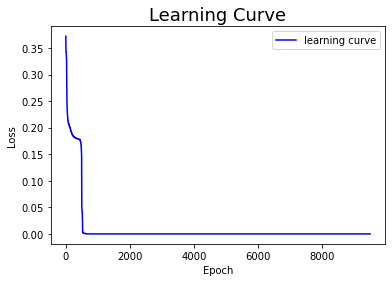

In [204]:
xorNN.trainNetwork(X_train, Y_train)

In [205]:
Y_predict = xorNN.predict(X_train)

Predict:0, [0. 0.]
Predict:1, [0. 1.]
Predict:2, [0.1 0.1]
Predict:3, [0.1 0.9]
Predict:4, [0.2 0.2]
Predict:5, [0.2 0.8]
Predict:6, [0.3 0.3]
Predict:7, [0.3 0.7]
Predict:8, [0.4 0.4]
Predict:9, [0.4 0.6]
Predict:10, [0.5 0.5]
Predict:11, [0.6 0.6]
Predict:12, [0.6 0.4]
Predict:13, [0.7 0.7]
Predict:14, [0.7 0.3]
Predict:15, [0.8 0.8]
Predict:16, [0.8 0.2]
Predict:17, [0.9 0.9]
Predict:18, [0.9 0.1]
Predict:19, [1. 1.]
Predict:20, [1. 0.]


print Red 0.00274255222230981
print Blue 0.9995391128813144
print Red 0.002683947572608318
print Blue 0.9995391124672968
print Red 0.0026357081801360563
print Blue 0.9995390202451603
print Red 0.002597014590688986
print Blue 0.9995272823704303
print Red 0.00256717859001891
print Blue 0.9948198810936018
print Red 0.0025456260124798575
print Red 0.0025318824656390348
print Blue 0.9922605332270915
print Red 0.0025255614863651686
print Blue 0.999373179596656
print Red 0.0025263547334907627
print Blue 0.9994237999909305
print Red 0.0025340238947849816
print Blue 0.9994251661461685
print Red 0.0025483940450435794
print Blue 0.9994252043974613


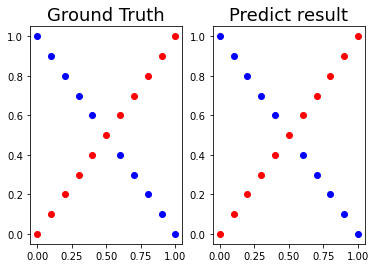

Accuracy--> 100.0%


In [207]:
show_result(X_train, Y_train, Y_predict)
show_accuracy(Y_train, Y_predict)

In [214]:
X_train, Y_train = GenerateData.generate_linear(900)
linearNN = SimpleNN()

In [215]:
linearNN.addLayer(n_neuron=2, n_inputs=2)
linearNN.addLayer(n_neuron=2)
linearNN.addLayer(n_neuron=1)

In [216]:
linearNN.describe()

----Network Description----
total 3 layers
2 hidden layer
one output layer
-Layer 1-
2 neurons
neuron0:
weight:[-0.7312715117751976, 0.6948674738744653]
bias:0.5275492379532281
neuron1:
weight:[-0.4898619485211566, -0.009129825816118098]
bias:-0.10101787042252375
-Layer 2-
2 neurons
neuron0:
weight:[0.3031859454455259, 0.5774467022710263]
bias:-0.8122808264515302
neuron1:
weight:[-0.9433050469559874, 0.6715302078397394]
bias:-0.13446586418989326
-Layer 3-
1 neurons
neuron0:
weight:[0.524560164915884, -0.9957878932977786]
bias:-0.10922561189039715
---------------------------


In [217]:
linearNN.setting(l_rate=0.3, n_epoch=4000, haveLearningCurve=True)

----Training Setting----
Epoch:4000
Learning Rate:0.3
Learning Curve:True
------------------------


----Training Setting----
Epoch:4000
Learning Rate:0.3
Learning Curve:True
------------------------
----Network Description----
total 3 layers
2 hidden layer
one output layer
-Layer 1-
2 neurons
neuron0:
weight:[-0.7312715117751976, 0.6948674738744653]
bias:0.5275492379532281
neuron1:
weight:[-0.4898619485211566, -0.009129825816118098]
bias:-0.10101787042252375
-Layer 2-
2 neurons
neuron0:
weight:[0.3031859454455259, 0.5774467022710263]
bias:-0.8122808264515302
neuron1:
weight:[-0.9433050469559874, 0.6715302078397394]
bias:-0.13446586418989326
-Layer 3-
1 neurons
neuron0:
weight:[0.524560164915884, -0.9957878932977786]
bias:-0.10922561189039715
---------------------------
==epoch=0, lrate=0.300, error=0.247==
==epoch=1, lrate=0.300, error=0.203==
==epoch=2, lrate=0.300, error=0.096==
==epoch=3, lrate=0.300, error=0.050==
==epoch=4, lrate=0.300, error=0.036==
==epoch=5, lrate=0.300, error=0.029==
==epoch=6, lrate=0.300, error=0.025==
==epoch=7, lrate=0.300, error=0.023==
==epoch=8, lrate

==epoch=192, lrate=0.300, error=0.007==
==epoch=193, lrate=0.300, error=0.007==
==epoch=194, lrate=0.300, error=0.007==
==epoch=195, lrate=0.300, error=0.007==
==epoch=196, lrate=0.300, error=0.007==
==epoch=197, lrate=0.300, error=0.007==
==epoch=198, lrate=0.300, error=0.007==
==epoch=199, lrate=0.300, error=0.007==
==epoch=200, lrate=0.300, error=0.007==
==epoch=201, lrate=0.300, error=0.007==
==epoch=202, lrate=0.300, error=0.007==
==epoch=203, lrate=0.300, error=0.007==
==epoch=204, lrate=0.300, error=0.007==
==epoch=205, lrate=0.300, error=0.007==
==epoch=206, lrate=0.300, error=0.007==
==epoch=207, lrate=0.300, error=0.007==
==epoch=208, lrate=0.300, error=0.007==
==epoch=209, lrate=0.300, error=0.007==
==epoch=210, lrate=0.300, error=0.007==
==epoch=211, lrate=0.300, error=0.007==
==epoch=212, lrate=0.300, error=0.007==
==epoch=213, lrate=0.300, error=0.007==
==epoch=214, lrate=0.300, error=0.007==
==epoch=215, lrate=0.300, error=0.007==
==epoch=216, lrate=0.300, error=0.007==


==epoch=397, lrate=0.300, error=0.005==
==epoch=398, lrate=0.300, error=0.005==
==epoch=399, lrate=0.300, error=0.005==
==epoch=400, lrate=0.300, error=0.005==
==epoch=401, lrate=0.300, error=0.007==
==epoch=402, lrate=0.300, error=0.005==
==epoch=403, lrate=0.300, error=0.005==
==epoch=404, lrate=0.300, error=0.004==
==epoch=405, lrate=0.300, error=0.005==
==epoch=406, lrate=0.300, error=0.005==
==epoch=407, lrate=0.300, error=0.004==
==epoch=408, lrate=0.300, error=0.005==
==epoch=409, lrate=0.300, error=0.004==
==epoch=410, lrate=0.300, error=0.006==
==epoch=411, lrate=0.300, error=0.005==
==epoch=412, lrate=0.300, error=0.005==
==epoch=413, lrate=0.300, error=0.004==
==epoch=414, lrate=0.300, error=0.006==
==epoch=415, lrate=0.300, error=0.004==
==epoch=416, lrate=0.300, error=0.005==
==epoch=417, lrate=0.300, error=0.005==
==epoch=418, lrate=0.300, error=0.005==
==epoch=419, lrate=0.300, error=0.004==
==epoch=420, lrate=0.300, error=0.005==
==epoch=421, lrate=0.300, error=0.004==


==epoch=607, lrate=0.300, error=0.003==
==epoch=608, lrate=0.300, error=0.003==
==epoch=609, lrate=0.300, error=0.003==
==epoch=610, lrate=0.300, error=0.005==
==epoch=611, lrate=0.300, error=0.003==
==epoch=612, lrate=0.300, error=0.004==
==epoch=613, lrate=0.300, error=0.005==
==epoch=614, lrate=0.300, error=0.003==
==epoch=615, lrate=0.300, error=0.004==
==epoch=616, lrate=0.300, error=0.004==
==epoch=617, lrate=0.300, error=0.003==
==epoch=618, lrate=0.300, error=0.004==
==epoch=619, lrate=0.300, error=0.003==
==epoch=620, lrate=0.300, error=0.003==
==epoch=621, lrate=0.300, error=0.003==
==epoch=622, lrate=0.300, error=0.005==
==epoch=623, lrate=0.300, error=0.006==
==epoch=624, lrate=0.300, error=0.003==
==epoch=625, lrate=0.300, error=0.003==
==epoch=626, lrate=0.300, error=0.004==
==epoch=627, lrate=0.300, error=0.004==
==epoch=628, lrate=0.300, error=0.005==
==epoch=629, lrate=0.300, error=0.004==
==epoch=630, lrate=0.300, error=0.004==
==epoch=631, lrate=0.300, error=0.004==


==epoch=813, lrate=0.300, error=0.004==
==epoch=814, lrate=0.300, error=0.003==
==epoch=815, lrate=0.300, error=0.003==
==epoch=816, lrate=0.300, error=0.003==
==epoch=817, lrate=0.300, error=0.005==
==epoch=818, lrate=0.300, error=0.003==
==epoch=819, lrate=0.300, error=0.004==
==epoch=820, lrate=0.300, error=0.004==
==epoch=821, lrate=0.300, error=0.005==
==epoch=822, lrate=0.300, error=0.004==
==epoch=823, lrate=0.300, error=0.004==
==epoch=824, lrate=0.300, error=0.005==
==epoch=825, lrate=0.300, error=0.003==
==epoch=826, lrate=0.300, error=0.003==
==epoch=827, lrate=0.300, error=0.003==
==epoch=828, lrate=0.300, error=0.005==
==epoch=829, lrate=0.300, error=0.004==
==epoch=830, lrate=0.300, error=0.003==
==epoch=831, lrate=0.300, error=0.005==
==epoch=832, lrate=0.300, error=0.002==
==epoch=833, lrate=0.300, error=0.004==
==epoch=834, lrate=0.300, error=0.005==
==epoch=835, lrate=0.300, error=0.001==
==epoch=836, lrate=0.300, error=0.004==
==epoch=837, lrate=0.300, error=0.007==


==epoch=1023, lrate=0.300, error=0.003==
==epoch=1024, lrate=0.300, error=0.002==
==epoch=1025, lrate=0.300, error=0.003==
==epoch=1026, lrate=0.300, error=0.004==
==epoch=1027, lrate=0.300, error=0.004==
==epoch=1028, lrate=0.300, error=0.004==
==epoch=1029, lrate=0.300, error=0.004==
==epoch=1030, lrate=0.300, error=0.004==
==epoch=1031, lrate=0.300, error=0.002==
==epoch=1032, lrate=0.300, error=0.003==
==epoch=1033, lrate=0.300, error=0.003==
==epoch=1034, lrate=0.300, error=0.001==
==epoch=1035, lrate=0.300, error=0.004==
==epoch=1036, lrate=0.300, error=0.002==
==epoch=1037, lrate=0.300, error=0.005==
==epoch=1038, lrate=0.300, error=0.005==
==epoch=1039, lrate=0.300, error=0.002==
==epoch=1040, lrate=0.300, error=0.002==
==epoch=1041, lrate=0.300, error=0.002==
==epoch=1042, lrate=0.300, error=0.004==
==epoch=1043, lrate=0.300, error=0.004==
==epoch=1044, lrate=0.300, error=0.002==
==epoch=1045, lrate=0.300, error=0.002==
==epoch=1046, lrate=0.300, error=0.003==
==epoch=1047, lr

==epoch=1226, lrate=0.300, error=0.002==
==epoch=1227, lrate=0.300, error=0.004==
==epoch=1228, lrate=0.300, error=0.002==
==epoch=1229, lrate=0.300, error=0.002==
==epoch=1230, lrate=0.300, error=0.004==
==epoch=1231, lrate=0.300, error=0.002==
==epoch=1232, lrate=0.300, error=0.002==
==epoch=1233, lrate=0.300, error=0.004==
==epoch=1234, lrate=0.300, error=0.004==
==epoch=1235, lrate=0.300, error=0.004==
==epoch=1236, lrate=0.300, error=0.004==
==epoch=1237, lrate=0.300, error=0.004==
==epoch=1238, lrate=0.300, error=0.002==
==epoch=1239, lrate=0.300, error=0.002==
==epoch=1240, lrate=0.300, error=0.003==
==epoch=1241, lrate=0.300, error=0.004==
==epoch=1242, lrate=0.300, error=0.004==
==epoch=1243, lrate=0.300, error=0.004==
==epoch=1244, lrate=0.300, error=0.004==
==epoch=1245, lrate=0.300, error=0.002==
==epoch=1246, lrate=0.300, error=0.002==
==epoch=1247, lrate=0.300, error=0.004==
==epoch=1248, lrate=0.300, error=0.004==
==epoch=1249, lrate=0.300, error=0.004==
==epoch=1250, lr

==epoch=1429, lrate=0.300, error=0.004==
==epoch=1430, lrate=0.300, error=0.001==
==epoch=1431, lrate=0.300, error=0.002==
==epoch=1432, lrate=0.300, error=0.003==
==epoch=1433, lrate=0.300, error=0.003==
==epoch=1434, lrate=0.300, error=0.003==
==epoch=1435, lrate=0.300, error=0.002==
==epoch=1436, lrate=0.300, error=0.002==
==epoch=1437, lrate=0.300, error=0.002==
==epoch=1438, lrate=0.300, error=0.002==
==epoch=1439, lrate=0.300, error=0.002==
==epoch=1440, lrate=0.300, error=0.002==
==epoch=1441, lrate=0.300, error=0.002==
==epoch=1442, lrate=0.300, error=0.001==
==epoch=1443, lrate=0.300, error=0.002==
==epoch=1444, lrate=0.300, error=0.003==
==epoch=1445, lrate=0.300, error=0.003==
==epoch=1446, lrate=0.300, error=0.003==
==epoch=1447, lrate=0.300, error=0.003==
==epoch=1448, lrate=0.300, error=0.002==
==epoch=1449, lrate=0.300, error=0.003==
==epoch=1450, lrate=0.300, error=0.001==
==epoch=1451, lrate=0.300, error=0.002==
==epoch=1452, lrate=0.300, error=0.003==
==epoch=1453, lr

==epoch=1636, lrate=0.300, error=0.003==
==epoch=1637, lrate=0.300, error=0.004==
==epoch=1638, lrate=0.300, error=0.004==
==epoch=1639, lrate=0.300, error=0.001==
==epoch=1640, lrate=0.300, error=0.001==
==epoch=1641, lrate=0.300, error=0.001==
==epoch=1642, lrate=0.300, error=0.001==
==epoch=1643, lrate=0.300, error=0.001==
==epoch=1644, lrate=0.300, error=0.001==
==epoch=1645, lrate=0.300, error=0.001==
==epoch=1646, lrate=0.300, error=0.001==
==epoch=1647, lrate=0.300, error=0.001==
==epoch=1648, lrate=0.300, error=0.001==
==epoch=1649, lrate=0.300, error=0.001==
==epoch=1650, lrate=0.300, error=0.001==
==epoch=1651, lrate=0.300, error=0.001==
==epoch=1652, lrate=0.300, error=0.001==
==epoch=1653, lrate=0.300, error=0.001==
==epoch=1654, lrate=0.300, error=0.001==
==epoch=1655, lrate=0.300, error=0.001==
==epoch=1656, lrate=0.300, error=0.001==
==epoch=1657, lrate=0.300, error=0.004==
==epoch=1658, lrate=0.300, error=0.004==
==epoch=1659, lrate=0.300, error=0.003==
==epoch=1660, lr

==epoch=1837, lrate=0.300, error=0.001==
==epoch=1838, lrate=0.300, error=0.001==
==epoch=1839, lrate=0.300, error=0.001==
==epoch=1840, lrate=0.300, error=0.003==
==epoch=1841, lrate=0.300, error=0.003==
==epoch=1842, lrate=0.300, error=0.003==
==epoch=1843, lrate=0.300, error=0.003==
==epoch=1844, lrate=0.300, error=0.003==
==epoch=1845, lrate=0.300, error=0.003==
==epoch=1846, lrate=0.300, error=0.001==
==epoch=1847, lrate=0.300, error=0.002==
==epoch=1848, lrate=0.300, error=0.004==
==epoch=1849, lrate=0.300, error=0.003==
==epoch=1850, lrate=0.300, error=0.002==
==epoch=1851, lrate=0.300, error=0.003==
==epoch=1852, lrate=0.300, error=0.002==
==epoch=1853, lrate=0.300, error=0.003==
==epoch=1854, lrate=0.300, error=0.002==
==epoch=1855, lrate=0.300, error=0.003==
==epoch=1856, lrate=0.300, error=0.001==
==epoch=1857, lrate=0.300, error=0.002==
==epoch=1858, lrate=0.300, error=0.001==
==epoch=1859, lrate=0.300, error=0.004==
==epoch=1860, lrate=0.300, error=0.003==
==epoch=1861, lr

==epoch=2040, lrate=0.300, error=0.001==
==epoch=2041, lrate=0.300, error=0.001==
==epoch=2042, lrate=0.300, error=0.001==
==epoch=2043, lrate=0.300, error=0.003==
==epoch=2044, lrate=0.300, error=0.003==
==epoch=2045, lrate=0.300, error=0.002==
==epoch=2046, lrate=0.300, error=0.004==
==epoch=2047, lrate=0.300, error=0.003==
==epoch=2048, lrate=0.300, error=0.002==
==epoch=2049, lrate=0.300, error=0.002==
==epoch=2050, lrate=0.300, error=0.001==
==epoch=2051, lrate=0.300, error=0.003==
==epoch=2052, lrate=0.300, error=0.002==
==epoch=2053, lrate=0.300, error=0.002==
==epoch=2054, lrate=0.300, error=0.001==
==epoch=2055, lrate=0.300, error=0.003==
==epoch=2056, lrate=0.300, error=0.003==
==epoch=2057, lrate=0.300, error=0.002==
==epoch=2058, lrate=0.300, error=0.001==
==epoch=2059, lrate=0.300, error=0.001==
==epoch=2060, lrate=0.300, error=0.001==
==epoch=2061, lrate=0.300, error=0.002==
==epoch=2062, lrate=0.300, error=0.003==
==epoch=2063, lrate=0.300, error=0.001==
==epoch=2064, lr

==epoch=2244, lrate=0.300, error=0.002==
==epoch=2245, lrate=0.300, error=0.003==
==epoch=2246, lrate=0.300, error=0.002==
==epoch=2247, lrate=0.300, error=0.003==
==epoch=2248, lrate=0.300, error=0.003==
==epoch=2249, lrate=0.300, error=0.002==
==epoch=2250, lrate=0.300, error=0.003==
==epoch=2251, lrate=0.300, error=0.003==
==epoch=2252, lrate=0.300, error=0.003==
==epoch=2253, lrate=0.300, error=0.001==
==epoch=2254, lrate=0.300, error=0.001==
==epoch=2255, lrate=0.300, error=0.002==
==epoch=2256, lrate=0.300, error=0.001==
==epoch=2257, lrate=0.300, error=0.003==
==epoch=2258, lrate=0.300, error=0.003==
==epoch=2259, lrate=0.300, error=0.002==
==epoch=2260, lrate=0.300, error=0.001==
==epoch=2261, lrate=0.300, error=0.001==
==epoch=2262, lrate=0.300, error=0.003==
==epoch=2263, lrate=0.300, error=0.003==
==epoch=2264, lrate=0.300, error=0.002==
==epoch=2265, lrate=0.300, error=0.003==
==epoch=2266, lrate=0.300, error=0.002==
==epoch=2267, lrate=0.300, error=0.003==
==epoch=2268, lr

==epoch=2450, lrate=0.300, error=0.002==
==epoch=2451, lrate=0.300, error=0.002==
==epoch=2452, lrate=0.300, error=0.001==
==epoch=2453, lrate=0.300, error=0.001==
==epoch=2454, lrate=0.300, error=0.003==
==epoch=2455, lrate=0.300, error=0.001==
==epoch=2456, lrate=0.300, error=0.003==
==epoch=2457, lrate=0.300, error=0.002==
==epoch=2458, lrate=0.300, error=0.002==
==epoch=2459, lrate=0.300, error=0.003==
==epoch=2460, lrate=0.300, error=0.002==
==epoch=2461, lrate=0.300, error=0.002==
==epoch=2462, lrate=0.300, error=0.002==
==epoch=2463, lrate=0.300, error=0.002==
==epoch=2464, lrate=0.300, error=0.001==
==epoch=2465, lrate=0.300, error=0.003==
==epoch=2466, lrate=0.300, error=0.001==
==epoch=2467, lrate=0.300, error=0.003==
==epoch=2468, lrate=0.300, error=0.003==
==epoch=2469, lrate=0.300, error=0.002==
==epoch=2470, lrate=0.300, error=0.002==
==epoch=2471, lrate=0.300, error=0.003==
==epoch=2472, lrate=0.300, error=0.002==
==epoch=2473, lrate=0.300, error=0.002==
==epoch=2474, lr

==epoch=2651, lrate=0.300, error=0.001==
==epoch=2652, lrate=0.300, error=0.003==
==epoch=2653, lrate=0.300, error=0.002==
==epoch=2654, lrate=0.300, error=0.003==
==epoch=2655, lrate=0.300, error=0.002==
==epoch=2656, lrate=0.300, error=0.002==
==epoch=2657, lrate=0.300, error=0.001==
==epoch=2658, lrate=0.300, error=0.003==
==epoch=2659, lrate=0.300, error=0.002==
==epoch=2660, lrate=0.300, error=0.002==
==epoch=2661, lrate=0.300, error=0.002==
==epoch=2662, lrate=0.300, error=0.003==
==epoch=2663, lrate=0.300, error=0.003==
==epoch=2664, lrate=0.300, error=0.002==
==epoch=2665, lrate=0.300, error=0.002==
==epoch=2666, lrate=0.300, error=0.001==
==epoch=2667, lrate=0.300, error=0.003==
==epoch=2668, lrate=0.300, error=0.002==
==epoch=2669, lrate=0.300, error=0.002==
==epoch=2670, lrate=0.300, error=0.002==
==epoch=2671, lrate=0.300, error=0.002==
==epoch=2672, lrate=0.300, error=0.003==
==epoch=2673, lrate=0.300, error=0.003==
==epoch=2674, lrate=0.300, error=0.003==
==epoch=2675, lr

==epoch=2851, lrate=0.300, error=0.002==
==epoch=2852, lrate=0.300, error=0.001==
==epoch=2853, lrate=0.300, error=0.002==
==epoch=2854, lrate=0.300, error=0.001==
==epoch=2855, lrate=0.300, error=0.003==
==epoch=2856, lrate=0.300, error=0.003==
==epoch=2857, lrate=0.300, error=0.002==
==epoch=2858, lrate=0.300, error=0.001==
==epoch=2859, lrate=0.300, error=0.003==
==epoch=2860, lrate=0.300, error=0.003==
==epoch=2861, lrate=0.300, error=0.001==
==epoch=2862, lrate=0.300, error=0.003==
==epoch=2863, lrate=0.300, error=0.002==
==epoch=2864, lrate=0.300, error=0.002==
==epoch=2865, lrate=0.300, error=0.002==
==epoch=2866, lrate=0.300, error=0.003==
==epoch=2867, lrate=0.300, error=0.001==
==epoch=2868, lrate=0.300, error=0.003==
==epoch=2869, lrate=0.300, error=0.002==
==epoch=2870, lrate=0.300, error=0.003==
==epoch=2871, lrate=0.300, error=0.001==
==epoch=2872, lrate=0.300, error=0.003==
==epoch=2873, lrate=0.300, error=0.001==
==epoch=2874, lrate=0.300, error=0.002==
==epoch=2875, lr

==epoch=3051, lrate=0.300, error=0.003==
==epoch=3052, lrate=0.300, error=0.001==
==epoch=3053, lrate=0.300, error=0.003==
==epoch=3054, lrate=0.300, error=0.002==
==epoch=3055, lrate=0.300, error=0.002==
==epoch=3056, lrate=0.300, error=0.001==
==epoch=3057, lrate=0.300, error=0.003==
==epoch=3058, lrate=0.300, error=0.001==
==epoch=3059, lrate=0.300, error=0.003==
==epoch=3060, lrate=0.300, error=0.003==
==epoch=3061, lrate=0.300, error=0.001==
==epoch=3062, lrate=0.300, error=0.003==
==epoch=3063, lrate=0.300, error=0.001==
==epoch=3064, lrate=0.300, error=0.003==
==epoch=3065, lrate=0.300, error=0.001==
==epoch=3066, lrate=0.300, error=0.003==
==epoch=3067, lrate=0.300, error=0.001==
==epoch=3068, lrate=0.300, error=0.003==
==epoch=3069, lrate=0.300, error=0.001==
==epoch=3070, lrate=0.300, error=0.001==
==epoch=3071, lrate=0.300, error=0.003==
==epoch=3072, lrate=0.300, error=0.001==
==epoch=3073, lrate=0.300, error=0.003==
==epoch=3074, lrate=0.300, error=0.001==
==epoch=3075, lr

==epoch=3255, lrate=0.300, error=0.002==
==epoch=3256, lrate=0.300, error=0.003==
==epoch=3257, lrate=0.300, error=0.003==
==epoch=3258, lrate=0.300, error=0.002==
==epoch=3259, lrate=0.300, error=0.002==
==epoch=3260, lrate=0.300, error=0.003==
==epoch=3261, lrate=0.300, error=0.002==
==epoch=3262, lrate=0.300, error=0.003==
==epoch=3263, lrate=0.300, error=0.002==
==epoch=3264, lrate=0.300, error=0.003==
==epoch=3265, lrate=0.300, error=0.002==
==epoch=3266, lrate=0.300, error=0.003==
==epoch=3267, lrate=0.300, error=0.002==
==epoch=3268, lrate=0.300, error=0.003==
==epoch=3269, lrate=0.300, error=0.002==
==epoch=3270, lrate=0.300, error=0.003==
==epoch=3271, lrate=0.300, error=0.002==
==epoch=3272, lrate=0.300, error=0.003==
==epoch=3273, lrate=0.300, error=0.003==
==epoch=3274, lrate=0.300, error=0.003==
==epoch=3275, lrate=0.300, error=0.002==
==epoch=3276, lrate=0.300, error=0.003==
==epoch=3277, lrate=0.300, error=0.002==
==epoch=3278, lrate=0.300, error=0.003==
==epoch=3279, lr

==epoch=3457, lrate=0.300, error=0.002==
==epoch=3458, lrate=0.300, error=0.002==
==epoch=3459, lrate=0.300, error=0.001==
==epoch=3460, lrate=0.300, error=0.002==
==epoch=3461, lrate=0.300, error=0.002==
==epoch=3462, lrate=0.300, error=0.002==
==epoch=3463, lrate=0.300, error=0.003==
==epoch=3464, lrate=0.300, error=0.002==
==epoch=3465, lrate=0.300, error=0.003==
==epoch=3466, lrate=0.300, error=0.002==
==epoch=3467, lrate=0.300, error=0.003==
==epoch=3468, lrate=0.300, error=0.003==
==epoch=3469, lrate=0.300, error=0.002==
==epoch=3470, lrate=0.300, error=0.002==
==epoch=3471, lrate=0.300, error=0.003==
==epoch=3472, lrate=0.300, error=0.001==
==epoch=3473, lrate=0.300, error=0.001==
==epoch=3474, lrate=0.300, error=0.001==
==epoch=3475, lrate=0.300, error=0.001==
==epoch=3476, lrate=0.300, error=0.002==
==epoch=3477, lrate=0.300, error=0.002==
==epoch=3478, lrate=0.300, error=0.003==
==epoch=3479, lrate=0.300, error=0.001==
==epoch=3480, lrate=0.300, error=0.001==
==epoch=3481, lr

==epoch=3660, lrate=0.300, error=0.002==
==epoch=3661, lrate=0.300, error=0.002==
==epoch=3662, lrate=0.300, error=0.002==
==epoch=3663, lrate=0.300, error=0.001==
==epoch=3664, lrate=0.300, error=0.002==
==epoch=3665, lrate=0.300, error=0.002==
==epoch=3666, lrate=0.300, error=0.002==
==epoch=3667, lrate=0.300, error=0.002==
==epoch=3668, lrate=0.300, error=0.001==
==epoch=3669, lrate=0.300, error=0.002==
==epoch=3670, lrate=0.300, error=0.002==
==epoch=3671, lrate=0.300, error=0.002==
==epoch=3672, lrate=0.300, error=0.001==
==epoch=3673, lrate=0.300, error=0.002==
==epoch=3674, lrate=0.300, error=0.002==
==epoch=3675, lrate=0.300, error=0.002==
==epoch=3676, lrate=0.300, error=0.001==
==epoch=3677, lrate=0.300, error=0.002==
==epoch=3678, lrate=0.300, error=0.002==
==epoch=3679, lrate=0.300, error=0.001==
==epoch=3680, lrate=0.300, error=0.002==
==epoch=3681, lrate=0.300, error=0.002==
==epoch=3682, lrate=0.300, error=0.002==
==epoch=3683, lrate=0.300, error=0.002==
==epoch=3684, lr

==epoch=3861, lrate=0.300, error=0.002==
==epoch=3862, lrate=0.300, error=0.003==
==epoch=3863, lrate=0.300, error=0.001==
==epoch=3864, lrate=0.300, error=0.003==
==epoch=3865, lrate=0.300, error=0.003==
==epoch=3866, lrate=0.300, error=0.003==
==epoch=3867, lrate=0.300, error=0.003==
==epoch=3868, lrate=0.300, error=0.002==
==epoch=3869, lrate=0.300, error=0.002==
==epoch=3870, lrate=0.300, error=0.001==
==epoch=3871, lrate=0.300, error=0.002==
==epoch=3872, lrate=0.300, error=0.001==
==epoch=3873, lrate=0.300, error=0.002==
==epoch=3874, lrate=0.300, error=0.002==
==epoch=3875, lrate=0.300, error=0.001==
==epoch=3876, lrate=0.300, error=0.002==
==epoch=3877, lrate=0.300, error=0.002==
==epoch=3878, lrate=0.300, error=0.002==
==epoch=3879, lrate=0.300, error=0.001==
==epoch=3880, lrate=0.300, error=0.002==
==epoch=3881, lrate=0.300, error=0.002==
==epoch=3882, lrate=0.300, error=0.001==
==epoch=3883, lrate=0.300, error=0.002==
==epoch=3884, lrate=0.300, error=0.002==
==epoch=3885, lr

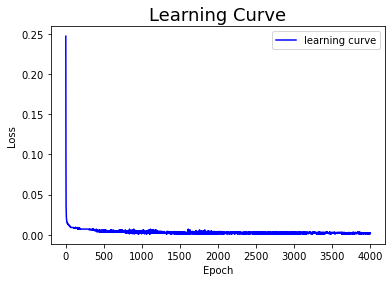

In [218]:
linearNN.trainNetwork(X_train, Y_train)

Predict:0, [0.40196491 0.44793069]
Predict:1, [0.21347983 0.38573059]
Predict:2, [0.78853391 0.00726105]
Predict:3, [0.15278085 0.16770886]
Predict:4, [0.01061023 0.90107212]
Predict:5, [0.53290299 0.62239668]
Predict:6, [0.06648551 0.8395228 ]
Predict:7, [0.66284749 0.40788183]
Predict:8, [0.44911357 0.11419347]
Predict:9, [0.60704273 0.29869656]
Predict:10, [0.17803169 0.87442917]
Predict:11, [0.25411618 0.04400904]
Predict:12, [0.99766346 0.30941608]
Predict:13, [0.53286831 0.6580917 ]
Predict:14, [0.63828121 0.78130592]
Predict:15, [0.05281356 0.94285851]
Predict:16, [0.28592314 0.61940796]
Predict:17, [0.22379339 0.8013011 ]
Predict:18, [0.62557614 0.86264036]
Predict:19, [0.38798649 0.63780424]
Predict:20, [0.37288506 0.37354672]
Predict:21, [0.39322053 0.13245136]
Predict:22, [0.16833145 0.78689029]
Predict:23, [0.01891596 0.69769184]
Predict:24, [0.42054762 0.7787233 ]
Predict:25, [0.41149132 0.35092387]
Predict:26, [0.76369914 0.34427342]
Predict:27, [0.77383461 0.27577265]
Pr

print Blue 0.9981836730725973
print Blue 0.9989211290103823
print Red 9.477345671336162e-06
print Blue 0.972777838808906
print Blue 0.9989775427899231
print Blue 0.9988972490236676
print Blue 0.9989775026190857
print Red 9.575273549851711e-06
print Red 9.488802801752465e-06
print Red 9.513082039734056e-06
print Blue 0.998977472035391
print Red 9.4995261899788e-06
print Red 9.479016756237325e-06
print Blue 0.9989484006238823
print Blue 0.9989635760467931
print Blue 0.9989775458586433
print Blue 0.998972556738526
print Blue 0.9989772460305605
print Blue 0.9989742174505035
print Blue 0.9989687408996824
print Red 0.5043249940349103
print Red 9.50017727642517e-06
print Blue 0.9989773153570395
print Blue 0.9989773249646658
print Blue 0.9989756392435047
print Red 1.01565622224138e-05
print Red 9.495557308550267e-06
print Red 9.484213788393123e-06
print Blue 0.9989631467366122
print Red 1.2545470119855813e-05
print Red 0.00027309011341106567
print Red 9.512197851247819e-06
print Blue 0.9988630

print Blue 0.9989570889426322
print Blue 0.9989414575810142
print Blue 0.9989775147023479
print Blue 0.9989772276748825
print Red 1.1650042255756525e-05
print Blue 0.9988936161374821
print Blue 0.9988462956077253
print Red 9.47721367371758e-06
print Blue 0.992480418079543
print Blue 0.9988871991704789
print Blue 0.9972264792031358
print Red 9.849624144045404e-06
print Red 0.0002258568387208205
print Blue 0.9989773651203392
print Red 9.477190547677747e-06
print Blue 0.998977449008332
print Blue 0.9989650120211594
print Blue 0.9989748278115739
print Blue 0.9989772136044314
print Red 1.0913304715060446e-05
print Red 9.480484170945497e-06
print Blue 0.9988783335634583
print Blue 0.9989771491870024
print Blue 0.9989774448111423
print Blue 0.9989775452473001
print Red 9.989637219339191e-06
print Blue 0.998969843529199
print Red 9.74015384271175e-06
print Red 9.478245233631268e-06
print Blue 0.9989726943825484
print Red 1.0088837900570265e-05
print Blue 0.9937616445975485
print Red 0.19275590

print Blue 0.9989330106014377
print Blue 0.9989592216759864
print Red 9.69687628749473e-06
print Red 9.607174152967425e-06
print Red 9.482710753451186e-06
print Blue 0.9989763271725702
print Red 9.47742778945419e-06
print Blue 0.9989749348822161
print Red 9.85474522751924e-06
print Red 9.626111029926119e-06
print Red 9.588707246123679e-06
print Red 9.47872969725814e-06
print Blue 0.998939495299694
print Red 9.477498718489694e-06
print Red 9.487067257817738e-06
print Blue 0.9989775228590221
print Red 9.559127262680728e-06
print Red 9.477287004601848e-06
print Blue 0.9989674373058389
print Blue 0.9989749771374158
print Blue 0.9989775182647896
print Blue 0.9989507172137514
print Red 9.483508957188788e-06
print Red 9.480184784298791e-06
print Blue 0.9989761768680625
print Red 9.484307986292776e-06
print Red 9.619566749877362e-06
print Blue 0.9989757044731749
print Red 2.9964526161280327e-05
print Red 1.0279957634421022e-05
print Blue 0.9989430044924895
print Blue 0.9989766723384456
print R

print Red 9.642131296407057e-06
print Red 1.1020702885082733e-05
print Blue 0.9989774518436617
print Red 9.477191890178253e-06
print Blue 0.9989753961656558
print Blue 0.9989758442000198
print Red 1.0607462537879905e-05
print Blue 0.998877269892352
print Red 9.483944848441598e-06
print Red 9.483027322520603e-06
print Blue 0.9989746983558572
print Blue 0.9989082648124417
print Blue 0.9989456097653642
print Red 9.492286229873848e-06
print Blue 0.9989774774792843
print Blue 0.9989604118802762
print Red 1.8903122121672894e-05
print Red 1.007696498913361e-05
print Red 9.47777655747658e-06
print Blue 0.9747413260919305
print Blue 0.998970226441574
print Red 1.0282031340994652e-05
print Red 0.00020454072962613158


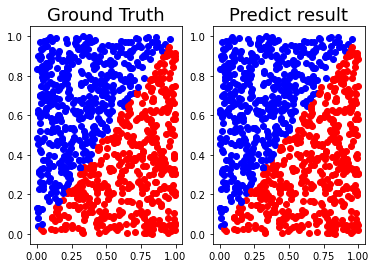

Accuracy--> 99.8%


In [219]:
Y_predict = linearNN.predict(X_train)
show_result(X_train, Y_train, Y_predict)
show_accuracy(Y_train, Y_predict)

In [ ]:
seed(1)
X_train, Y_train = generate_XOR_easy()
network = establishNN(2,2,2,1)

l_rate = 4
n_epoch = 9500
n_outputs = 1
trainNetwork(network, X_train, Y_train, l_rate, n_epoch, n_outputs, havelearningCurve=True)

In [ ]:
Y_predict = predictModel(network, X_train)
print(Y_predict)
show_result(X_train, Y_train, Y_predict)

In [ ]:
seed(1)
X_train, Y_train = generate_linear(n=100)
network = establishNN(2,2,2,1)

l_rate = 0.5
n_epoch = 2000
n_outputs = 1
trainNetwork(network, X_train, Y_train, l_rate, n_epoch, n_outputs, havelearningCurve=True)

In [ ]:
Y_predict = predictModel(network, X_train)
show_result(X_train, Y_train, Y_predict)

In [ ]:
network

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
uniform(-1,1)

In [ ]:
a = [1,2]
b = a.copy()
a.clear()
b[0]= 30
b

In [ ]:
def test(**karg):
    print(karg)
test(n_input=3)